In [1]:
pip install web3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 501 kB 14.5 MB/s 
     |████████████████████████████████| 82 kB 755 kB/s 
     |████████████████████████████████| 102 kB 10.3 MB/s 
     |████████████████████████████████| 101 kB 8.6 MB/s 
     |████████████████████████████████| 1.1 MB 91.5 MB/s 
     |████████████████████████████████| 45 kB 3.0 MB/s 
     |████████████████████████████████| 241 kB 83.9 MB/s 
     |████████████████████████████████| 2.3 MB 55.9 MB/s 
     |████████████████████████████████| 1.8 MB 53.1 MB/s 
     |████████████████████████████████| 1.9 MB 47.6 MB/s 
  Created wheel for parsimonious: filename=parsimonious-0.8.1-py3-none-any.whl size=42725 sha256=1d5a87b2a56db06be2ef53b2b5d404cd7e7e08e53217a7f198c40d7aa27d6a86
  Stored in directory: /root/.cache/pip/wheels/d8/af/19/fb896f509a437aca2dcf62583e84d7fb2cd5b628c1564a609c
  Created wheel for varint: filename=varint-1.0.2-py3-non

In [1]:
from google.colab import drive, files
drive.mount('/content/drive/')

Mounted at /content/drive/


In [38]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn.neural_network import MLPClassifier #Importing MLPClassifier for classification.
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import json
from web3 import Web3
import os
import datetime;
from datetime import datetime 

In [53]:
# add your blockchain connection information
infura_url = 'https://goerli.infura.io/v3/5ff13871021244b79ad9642b2f6499e3'
web3 = Web3(Web3.HTTPProvider(infura_url))
chain_id = 5

account = "0xc144cD60Be02F5d5C6CFfcb56DcE32D99097Afb9"
private_key = '3cd656d14571c2f3c39b97dc273060f7653ec6c2fbbb916e717b4e9f1e28f147'

#contract address and abi
contract_Address = '0x2CA423aBcE1E263aa44E3c3A87e7a5EaD19bA481'
contract_abi = json.loads('[ 	{ 		"inputs": [], 		"name": "retrievePredicitons", 		"outputs": [ 			{ 				"components": [ 					{ 						"internalType": "string", 						"name": "prediction", 						"type": "string" 					}, 					{ 						"internalType": "string", 						"name": "timeData", 						"type": "string" 					} 				], 				"internalType": "struct IA.Prediction[]", 				"name": "", 				"type": "tuple[]" 			} 		], 		"stateMutability": "view", 		"type": "function" 	}, 	{ 		"inputs": [], 		"name": "retrieveRecords", 		"outputs": [ 			{ 				"internalType": "string[]", 				"name": "", 				"type": "string[]" 			} 		], 		"stateMutability": "view", 		"type": "function" 	}, 	{ 		"inputs": [ 			{ 				"internalType": "string", 				"name": "_prediciton", 				"type": "string" 			}, 			{ 				"internalType": "string", 				"name": "_timeData", 				"type": "string" 			} 		], 		"name": "storePrediction", 		"outputs": [], 		"stateMutability": "nonpayable", 		"type": "function" 	}, 	{ 		"inputs": [ 			{ 				"internalType": "string[]", 				"name": "_records", 				"type": "string[]" 			} 		], 		"name": "storeRecords", 		"outputs": [], 		"stateMutability": "nonpayable", 		"type": "function" 	} ]')

contract = web3.eth.contract(address=contract_Address, abi=contract_abi)
nonce = web3.eth.getTransactionCount(account)

In [54]:
def obterRegistros():
    # Wait for transaction to be mined
    transaction = contract.functions.retrieveRecords().call()
    
    return transaction

In [55]:
def enviarPredicao(_predicao, _timestamp):   
    transaction = contract.functions.storePrediction(_predicao, _timestamp).buildTransaction(
        {
            "gasPrice": web3.eth.gas_price,
            "chainId": chain_id,
            "from": account,
            "nonce": nonce 
        }
    )
    signed_transaction = web3.eth.account.sign_transaction(transaction, private_key = private_key)
    transaction_hash = web3.eth.send_raw_transaction(signed_transaction.rawTransaction)
    transaction_receipt = web3.eth.wait_for_transaction_receipt(transaction_hash)

In [56]:
def obterPredicoes():
    # Wait for transaction to be mined
    transaction = contract.functions.retrievePredicitons().call()
    
    return transaction

In [57]:
arq = open("/content/drive/MyDrive/IA/temp.csv","w")

for lnh in obterRegistros():
    print(lnh)
    arq.write(lnh)
    arq.write("\n")
 
arq.close()

Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species

1,5.1,3.5,1.4,0.2,Iris-setosa

2,4.9,3.0,1.4,0.2,Iris-setosa

3,4.7,3.2,1.3,0.2,Iris-setosa

4,4.6,3.1,1.5,0.2,Iris-setosa

5,5.0,3.6,1.4,0.2,Iris-setosa

6,5.4,3.9,1.7,0.4,Iris-setosa

7,4.6,3.4,1.4,0.3,Iris-setosa

8,5.0,3.4,1.5,0.2,Iris-setosa

9,4.4,2.9,1.4,0.2,Iris-setosa

10,4.9,3.1,1.5,0.1,Iris-setosa

11,5.4,3.7,1.5,0.2,Iris-setosa

12,4.8,3.4,1.6,0.2,Iris-setosa

13,4.8,3.0,1.4,0.1,Iris-setosa

14,4.3,3.0,1.1,0.1,Iris-setosa

15,5.8,4.0,1.2,0.2,Iris-setosa

16,5.7,4.4,1.5,0.4,Iris-setosa

17,5.4,3.9,1.3,0.4,Iris-setosa

18,5.1,3.5,1.4,0.3,Iris-setosa

19,5.7,3.8,1.7,0.3,Iris-setosa

20,5.1,3.8,1.5,0.3,Iris-setosa

21,5.4,3.4,1.7,0.2,Iris-setosa

22,5.1,3.7,1.5,0.4,Iris-setosa

23,4.6,3.6,1.0,0.2,Iris-setosa

24,5.1,3.3,1.7,0.5,Iris-setosa

25,4.8,3.4,1.9,0.2,Iris-setosa

26,5.0,3.0,1.6,0.2,Iris-setosa

27,5.0,3.4,1.6,0.4,Iris-setosa

28,5.2,3.5,1.5,0.2,Iris-setosa

29,5.2,3.4,1.4,0.2,Iris-setosa

30,4.7,3.2,1.6,

In [58]:
iris = pd.read_csv("/content/drive/MyDrive/IA/temp.csv") #load the dataset

In [59]:
iris.head(5) #show the first 5 rows from the dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [60]:
iris.info()  #checking if there is any inconsistency in the dataset
#as we see there are no null values in the dataset, so the data can be processed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [61]:
train, test = train_test_split(iris, test_size = 0.3)# in this our main data is split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(105, 6)
(45, 6)


In [62]:
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]# taking the training data features
train_y = train.Species# output of our training data
test_X = test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking test data features
test_y = test.Species   #output value of test data

In [63]:
#Initializing the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,100,100),max_iter=500)
#Fitting the training data to the network
mlp.fit(train_X, train_y)

#Predicting y for X_val
prediction = mlp.predict(test_X)

print('The accuracy of the MultLayer Perceptron is',metrics.accuracy_score(test_y,prediction))

The accuracy of the MultLayer Perceptron is 0.9111111111111111


In [64]:
cm = confusion_matrix(test_y,prediction)
cm

array([[13,  0,  0],
       [ 0, 15,  3],
       [ 0,  1, 13]])

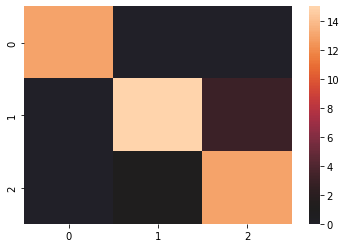

In [65]:
sns.heatmap(cm, center=True)
plt.show()

In [66]:
# new data to be classified
X_new = np.array([[5.1,3.5,1.4,0.2]])

prediction = mlp.predict(X_new) 
  
current_time = datetime.now()  
time_stamp = current_time.timestamp()
date_time = datetime.fromtimestamp(time_stamp)
print("The date and time is:", date_time)

if prediction[0] == 0.0:
  print('Setosa')
  enviarPredicao('Setosa', str(date_time))
elif prediction[0] == 1.0:
  print('Versicolor')
  enviarPredicao('Versicolor', str(date_time))
else:
  print('Virginica')
  enviarPredicao('Virginica', str(date_time))

os.remove('/content/drive/MyDrive/IA/temp.csv')

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


The date and time is: 2022-12-28 04:10:19.650862
Virginica


In [67]:
print(obterPredicoes())

[('Virginica', '2022-12-27 14:21:31.387767'), ('Virginica', '2022-12-27 18:31:09.244602'), ('Virginica', '2022-12-27 18:35:27.682719')]
